In [1]:
%pip install tensorflow scikit-learn pandas numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('torque_drag_dataset.csv')

# Split the dataset into input features (X) and target variables (y)
X = data[['Measured Depth (MD)', 'TVD', 'Inclination', 'Azimuth', 'WOB', 'RPM', 
          'Fluid Viscosity', 'Fluid Density', 'Dogleg Severity', 'Tripping Speed']].values
y_torque = data['Surface Torque'].values
y_drag = data['Hook Load'].values  # Drag force derived from Hook Load

# Split the data into training and test sets
X_train, X_test, y_torque_train, y_torque_test = train_test_split(X, y_torque, test_size=0.2, random_state=42)
X_train, X_test, y_drag_train, y_drag_test = train_test_split(X, y_drag, test_size=0.2, random_state=42)


In [4]:
data

,Measured Depth (MD),TVD,Inclination,Azimuth,Surface Torque,Downhole Torque,Hook Load,WOB,RPM,ROP,Fluid Viscosity,Fluid Density,Dogleg Severity,Tripping Speed
0,1000.00,953.10,4.88,179.52,8597.62,8214.90,22344.99,16080.72,127.74,24.01,41.23,1210.94,3.94,6.16
1,1010.53,958.29,6.18,182.48,8360.00,7926.79,22385.63,15127.99,134.94,28.96,38.34,1273.06,3.01,5.83
2,1021.05,965.75,6.78,183.77,8011.39,7944.24,23725.93,16821.29,135.58,26.81,38.10,1255.99,3.28,5.86
3,1031.58,975.22,6.86,185.87,8605.32,8275.32,22443.69,15180.94,107.79,29.65,43.43,1207.48,3.37,9.75
4,1042.11,976.78,6.61,186.96,8762.87,8472.65,20183.42,15702.14,118.59,26.44,42.22,1286.65,3.04,8.68
5,1052.63,978.44,8.00,188.46,8496.02,8413.34,21644.28,15373.10,103.92,28.43,35.92,1273.34,2.11,5.63
6,1063.16,986.25,7.62,189.87,8582.60,7846.65,23611.79,15188.68,130.64,21.31,38.20,1257.89,2.16,9.82
7,1073.68,995.02,9.00,190.68,8781.92,8192.92,22940.51,15835.93,121.66,22.52,38.66,1265.68,3.87,9.07
8,1084.21,997.21,9.10,191.30,8761.84,7963.80,20999.84,15345.29,138.10,22.53,39.97,1275.22,2.96,7.66
9,1094.74,1002.28,10.41,194.08,8657.32,8411.50,24306.58,15236.27,111.79,25.78,44.67,1204.36,2.82,7.43


In [6]:
import tensorflow as tf
from keras import layers, models

# Define the model architecture
def build_model(input_dim):
    model = models.Sequential()
    model.add(layers.InputLayer(shape=(input_dim,)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2, activation='linear'))  # Two outputs (Torque, Drag)
    return model

# Build the model
input_dim = X_train.shape[1]
model = build_model(input_dim)


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [8]:
# Stack Torque and Drag together for the training targets
y_train = np.vstack((y_torque_train, y_drag_train)).T
y_test = np.vstack((y_torque_test, y_drag_test)).T


In [14]:
# Modify the model architecture with dropout
def build_model_with_dropout(input_dim):
    model = models.Sequential()
    model.add(layers.InputLayer(shape=(input_dim,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))  # Dropout to prevent overfitting
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))  # Another dropout layer
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2, activation='linear'))  # Two outputs (Torque, Drag)
    return model

# Rebuild the model
model = build_model_with_dropout(input_dim)

# Compile and train again with dropout
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 298996448.0000 - val_loss: 289381472.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 290055520.0000 - val_loss: 274145216.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 263166592.0000 - val_loss: 260556960.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 246935632.0000 - val_loss: 247506624.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 233881072.0000 - val_loss: 235284304.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 225320784.0000 - val_loss: 223014976.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 206883792.0000 - val_loss: 209011856.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 193485424.0000 - val_loss: 194413536.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 176765184.0000 - val_loss: 179886048.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 164498208.0000 - val_loss: 164994848.0000
E

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 7825174.0000 - val_loss: 3109496.5000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7541721.5000 - val_loss: 3600921.5000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 5360705.5000 - val_loss: 4355410.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8859085.0000 - val_loss: 5037755.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 9943171.0000 - val_loss: 5825328.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 6113309.5000 - val_loss: 6749529.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7821509.5000 - val_loss: 7403719.5000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7433536.0000 - val_loss: 8002950.5000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 6954578.5000 - val_loss: 8114388.5000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3932888.7500 - val_loss: 7886398.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Predict on the test set
y_pred = model.predict(X_test)

# Separate the predicted Torque and Drag
predicted_torque = y_pred[:, 0]
predicted_drag = y_pred[:, 1]

# Separate the true Torque and Drag for comparison
true_torque = y_test[:, 0]
true_drag = y_test[:, 1]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5465982.0000
Test Loss: 5465982.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics for Torque
mse_torque = mean_squared_error(true_torque, predicted_torque)
mae_torque = mean_absolute_error(true_torque, predicted_torque)
r2_torque = r2_score(true_torque, predicted_torque)

# Calculate evaluation metrics for Drag
mse_drag = mean_squared_error(true_drag, predicted_drag)
mae_drag = mean_absolute_error(true_drag, predicted_drag)
r2_drag = r2_score(true_drag, predicted_drag)

# Print the evaluation results
print(f"Torque MSE: {mse_torque}, MAE: {mae_torque}, R²: {r2_torque}")
print(f"Drag MSE: {mse_drag}, MAE: {mae_drag}, R²: {r2_drag}")


Torque MSE: 2173991.9032455706, MAE: 1430.4655810546874, R²: -62.63617091649648
Drag MSE: 8757968.408757053, MAE: 2821.1003906250007, R²: -76.41044861796009


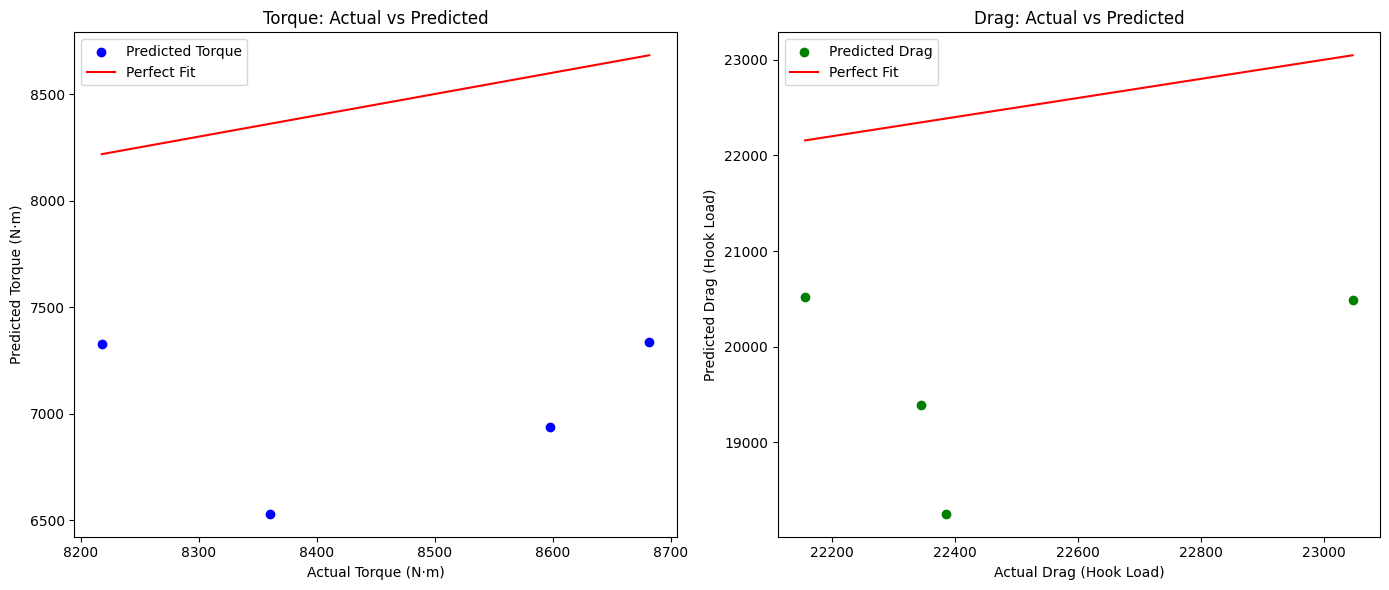

Actual torque:8464.307499999999
predicted torque:7033.841796875
Actual drag:22483.3875
predicted torque:19662.287109375


In [20]:
import matplotlib.pyplot as plt

# Plot the comparison for Torque
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(true_torque, predicted_torque, color='blue', label='Predicted Torque')
plt.plot([min(true_torque), max(true_torque)], [min(true_torque), max(true_torque)], color='red', label='Perfect Fit')
plt.xlabel('Actual Torque (N·m)')
plt.ylabel('Predicted Torque (N·m)')
plt.title('Torque: Actual vs Predicted')
plt.legend()

# Plot the comparison for Drag
plt.subplot(1, 2, 2)
plt.scatter(true_drag, predicted_drag, color='green', label='Predicted Drag')
plt.plot([min(true_drag), max(true_drag)], [min(true_drag), max(true_drag)], color='red', label='Perfect Fit')
plt.xlabel('Actual Drag (Hook Load)')
plt.ylabel('Predicted Drag (Hook Load)')
plt.title('Drag: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()
print(f"Actual torque:{np.mean(true_torque)}")
print(f"predicted torque:{np.mean(predicted_torque)}")

print(f"Actual drag:{np.mean(true_drag)}")
print(f"predicted torque:{np.mean(predicted_drag)}")
